In [9]:
import pandas as pd
import numpy as np


**Overall Explanation of Housing Data Columns**
    
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per ten grand
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion black population per town
- LSTAT - percent lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [10]:
df = pd.read_csv('boston.csv')

In [11]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
print(df['rad'].unique())
print(df['rad'].count())

[ 1  2  3  5  4  8  6  7 24]
506


**Set the X and y target variables**

In [13]:
X = df.drop('medv', axis = 1).values

y = df['medv'].values

Predict price from a single feature

In [14]:
#review rooms column only
X_rooms = X[:,6]

In [15]:
X_rooms

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [16]:
#check the datatypes of X and y

type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [17]:
#reshape each for plotting
y.reshape(-1,1)

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [18]:
X_rooms = X_rooms.reshape(-1,1)

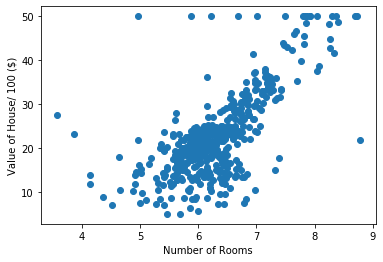

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_rooms, y)
plt.ylabel('Value of House/ 100 ($)')
plt.xlabel('Number of Rooms')
plt.show()

**Run a basic regression model:**

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#look at the regression prediction over the range of the data by using the min and max for the best fit line

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

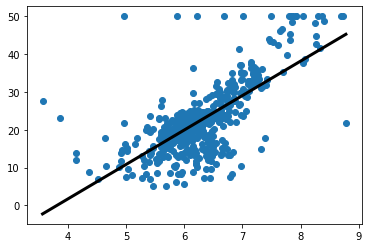

In [22]:
#plot the best fit line

plt.scatter(X_rooms, y)
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)

plt.show()

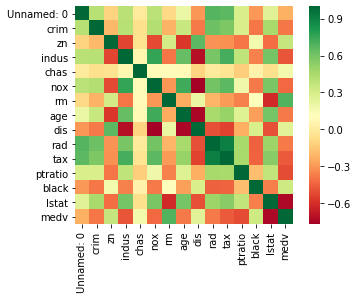

In [23]:
import seaborn as sns

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

**Data Exploration using Numpy**

In [24]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
#convert to numpy array

np_df = np.array(df)

In [26]:
#Review just the rooms and medv columns

np_rooms = np_df[:,[6,14]]

In [27]:
#review the shape of the new np array is correct
np_rooms.shape

(506, 2)

In [28]:
#descriptive statistics for the rooms column using Numpy

rooms_med = print(f'Median: {np.median(np_df[:,6])}')
rooms_mean = print(f'Mean: {np.mean(np_df[:,6])}')
rooms_std = print(f'STD: {np.std(np_df[:,6])}')

#Print out correlation between rooms and medv column. 
rooms_corr = print(f'Correlation Coef: {np.corrcoef(np_rooms[:,0], np_rooms[:,1])}')


Median: 6.208499999999999
Mean: 6.284634387351779
STD: 0.7019225143345689
Correlation Coef: [[1.         0.69535995]
 [0.69535995 1.        ]]


**Reviewing Houses only in the area of specific Highways ('RAD')**

In [38]:
#Reduce the higheway colum to only those houses by Highway [1  2  3  5  4  8  6  7 24]

np_rad = np_df[:, 9]

rad_1 = np_df[np_rad == 1]
rad_2 = np_df[np_rad == 2]
rad_3 = np_df[np_rad == 3]
rad_4 = np_df[np_rad == 4]
rad_5 = np_df[np_rad == 5]
rad_6 = np_df[np_rad == 6]
rad_7 = np_df[np_rad == 7]
rad_8 = np_df[np_rad == 8]
rad_24 = np_df[np_rad == 24]

In [39]:
#each of the rad arrays above contains all the columns but segmented by that specific highway adjacency
print(rad_1)

[[1.0000e+00 6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01
  6.5750e+00 6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01
  3.9690e+02 4.9800e+00 2.4000e+01]
 [1.9400e+02 2.1870e-02 6.0000e+01 2.9300e+00 0.0000e+00 4.0100e-01
  6.8000e+00 9.9000e+00 6.2196e+00 1.0000e+00 2.6500e+02 1.5600e+01
  3.9337e+02 5.0300e+00 3.1100e+01]
 [1.9500e+02 1.4390e-02 6.0000e+01 2.9300e+00 0.0000e+00 4.0100e-01
  6.6040e+00 1.8800e+01 6.2196e+00 1.0000e+00 2.6500e+02 1.5600e+01
  3.7670e+02 4.3800e+00 2.9100e+01]
 [2.5500e+02 4.8190e-02 8.0000e+01 3.6400e+00 0.0000e+00 3.9200e-01
  6.1080e+00 3.2000e+01 9.2203e+00 1.0000e+00 3.1500e+02 1.6400e+01
  3.9289e+02 6.5700e+00 2.1900e+01]
 [2.5600e+02 3.5480e-02 8.0000e+01 3.6400e+00 0.0000e+00 3.9200e-01
  5.8760e+00 1.9100e+01 9.2203e+00 1.0000e+00 3.1500e+02 1.6400e+01
  3.9518e+02 9.2500e+00 2.0900e+01]
 [2.8400e+02 1.5010e-02 9.0000e+01 1.2100e+00 1.0000e+00 4.0100e-01
  7.9230e+00 2.4800e+01 5.8850e+00 1.0000e+00 1.9800e+02 1.3600e+01
  3.

In [40]:
#Review median rooms of houses by all the highways.

print(f"Median rooms of houses by highway 1: {np.median(rad_1[:,6])}")
print(f"Median rooms of houses by highway 2: {np.median(rad_2[:,6])}")
print(f"Median rooms of houses by highway 3: {np.median(rad_3[:,6])}")
print(f"Median rooms of houses by highway 4: {np.median(rad_4[:,6])}")
print(f"Median rooms of houses by highway 5: {np.median(rad_5[:,6])}")
print(f"Median rooms of houses by highway 6: {np.median(rad_6[:,6])}")
print(f"Median rooms of houses by highway 7: {np.median(rad_7[:,6])}")
print(f"Median rooms of houses by highway 8: {np.median(rad_8[:,6])}")
print(f"Median rooms of houses by highway 24: {np.median(rad_24[:,6])}")


Median rooms of houses by highway 1: 6.5575
Median rooms of houses by highway 2: 6.4190000000000005
Median rooms of houses by highway 3: 6.3145
Median rooms of houses by highway 4: 6.064500000000001
Median rooms of houses by highway 5: 6.273
Median rooms of houses by highway 6: 6.0595
Median rooms of houses by highway 7: 6.59
Median rooms of houses by highway 8: 6.744
Median rooms of houses by highway 24: 6.176
